In [42]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('7_cars.csv')

In [48]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

In [ ]:
# мой вариант извлечения названия компании из названия автомобиля (слишком сложно)
df['company'] = df["CarName"].str.extract(r'^([^ ]+)')

In [3]:
df['company'] = df['CarName'].str.split(' ').str[0]

In [ ]:
# исправление опечаток в названиях компаний автомобилей ручным методом
df['company'] = df['company'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [4]:
df['company'] = df['company'].str.lower()

In [5]:
def fix_company(to_rep, how_rep):
    df['company'] = df['company'].str.replace(to_rep, how_rep)

In [6]:
fix_company('maxda', 'mazda')
fix_company('porcshce', 'porsche')
fix_company('toyouta', 'toyota')
fix_company('vokswagen', 'volkswagen')
fix_company('vw', 'volkswagen')

In [7]:
df['company'].nunique()

22

Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными

In [8]:
cols_to_keep = ['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'wheelbase', 'boreratio', 'horsepower', 'price']

In [9]:
cars = df[cols_to_keep]
cars.head()

,company,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,dohc,four,168.8,64.1,2548,130,88.6,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,dohc,four,168.8,64.1,2548,130,88.6,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,ohcv,six,171.2,65.5,2823,152,94.5,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,ohc,four,176.6,66.2,2337,109,99.8,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,ohc,five,176.6,66.4,2824,136,99.4,3.19,115,17450.0


In [10]:
cars.select_dtypes(include='number').corr()
# корреляционная матрица

,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,price
carlength,1.000000,0.841118,0.877728,0.683360,0.874587,0.606454,0.552623,0.682920
carwidth,0.841118,1.000000,0.867032,0.735433,0.795144,0.559150,0.640732,0.759325
curbweight,0.877728,0.867032,1.000000,0.850594,0.776386,0.648480,0.750739,0.835305
enginesize,0.683360,0.735433,0.850594,1.000000,0.569329,0.583774,0.809769,0.874145
wheelbase,0.874587,0.795144,0.776386,0.569329,1.000000,0.488750,0.353294,0.577816
boreratio,0.606454,0.559150,0.648480,0.583774,0.488750,1.000000,0.573677,0.553173
horsepower,0.552623,0.640732,0.750739,0.809769,0.353294,0.573677,1.000000,0.808139
price,0.682920,0.759325,0.835305,0.874145,0.577816,0.553173,0.808139,1.000000


In [11]:
corr_mat = cars.select_dtypes(include='number').corr()
corr_mat['price'].sort_values(ascending=False).round(2)
# корреляция признаков с колонкой price

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому давайте применим функцию под названием pd.get dummies(). Она создаёт т.н. фиктивные переменные на основе изначальных категорий, представленные в виде 0 и 1. Официально такое преобразование называется One-Hot Encoding.  
Для начала примените её только на категориальных переменных:  
df_dummy = pd.get_dummies(data=cars[[список_столбцов_типа_object]], drop_first = True)  
Теперь примените её ко всему датафрейму (с тем же набором колонок, что и на предыдущем шаге). Не забудьте сохранить результат, он нам ещё понадобится :)

In [12]:
cars.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
enginetype         object
cylindernumber     object
carlength         float64
carwidth          float64
curbweight          int64
enginesize          int64
wheelbase         float64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [ ]:
# код из ответов - неверный, т.к. создает дамми-переменные в виде булевых значений
cars_dummy = pd.get_dummies(data=cars[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']], drop_first=True)
cars_dummy.head()
# создание дамми-переменных

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [15]:
cars_dummy = pd.get_dummies(
    data=cars[['company', 'fueltype', 'aspiration', 'carbody',
               'drivewheel', 'enginetype', 'cylindernumber']],
    drop_first=True
).astype(int)
cars_lr = pd.get_dummies(data=cars, drop_first=True)

In [ ]:
# код из ответов - неверный, т.к. создает дамми-переменные в виде булевых значений
cars_lr = pd.get_dummies(data=cars, drop_first=True)
cars_lr.head()
# объединение всех признаков в одну таблицу для линейной регрессии

,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,168.8,64.1,2548,130,88.6,3.47,111,13495.0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,168.8,64.1,2548,130,88.6,3.47,111,16500.0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,171.2,65.5,2823,152,94.5,2.68,154,16500.0,False,False,...,False,False,True,False,False,False,True,False,False,False
3,176.6,66.2,2337,109,99.8,3.19,102,13950.0,True,False,...,True,False,False,False,False,True,False,False,False,False
4,176.6,66.4,2824,136,99.4,3.19,115,17450.0,True,False,...,True,False,False,False,True,False,False,False,False,False


In [16]:
bool_cols = cars_lr.select_dtypes(include='bool').columns
cars_lr[bool_cols] = cars_lr[bool_cols].astype(int)
cars_lr.head()
# преобразование булевых признаков в числовые

,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,168.8,64.1,2548,130,88.6,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,168.8,64.1,2548,130,88.6,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,171.2,65.5,2823,152,94.5,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,176.6,66.2,2337,109,99.8,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,176.6,66.4,2824,136,99.4,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


Построим модель с одним предиктором цены (price) - horsepower. Какой процент изменчивости объясняет полученная модель?

In [17]:
results = smf.ols('price ~ horsepower', data=cars_lr).fit()
print(results.summary())
# линейная регрессия price от horsepower
# R² = 0.653, p-value << 0.05, коэффициент при horsepower положительный, значит, с ростом horsepower растет и price
# но модель объясняет только 65.3% дисперсии price
# intercept - это значение price при horsepower = 0
# intercept отрицательный, что означает, что при horsepower = 0 цена будет отрицательной, что нелогично и не интерпретируемо

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                 Сб, 27 дек 2025   Prob (F-statistic):           1.48e-48
Time:                        15:17:50   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [18]:
# сделаем intercept интерпретируемым, центрировав признак horsepower относительно его среднего значения
cars_lr['horsepower_centered'] = cars_lr['horsepower'] - cars_lr['horsepower'].mean()
results_cent = smf.ols('price ~ horsepower_centered', data=cars_lr).fit()
print(results_cent.summary())
# intercept = 13207.1293 - это цена автомобиля со средним horsepower
# коэффициент при horsepower_centered остался таким же, как и при horsepower

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                 Сб, 27 дек 2025   Prob (F-statistic):           1.48e-48
Time:                        15:17:53   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.328e+04    

In [19]:
cars_lr['horsepower'].mean()
# среднее значение horsepower
# horsepower_centered = 163.2631 это означает что при увеличении horsepower на 1 единицу, цена автомобиля увеличивается в среднем на 163.2631 долларов

np.float64(104.1170731707317)

In [20]:
cars_lr['horsepower_centered'].round(3).head()

0     6.883
1     6.883
2    49.883
3    -2.117
4    10.883
Name: horsepower_centered, dtype: float64

In [21]:
cars_lr['horsepower_centered'].mean()
# среднее значение центрированного horsepower равно нулю

np.float64(5.47637815854126e-15)

In [22]:
cars_lr.drop(columns=['horsepower_centered'], inplace=True, axis=1)

Построим еще две модели:
- модель со всеми предикторами
- модель со всеми предикторами кроме марок машин
Выберем из этих моделей самую удачную. При выборе моделей нужно ориентироваться не только на количественные показатели, но также на контекст ее использования и здравый смысл.

In [23]:
x = cars_lr.drop(columns=['price'], axis='columns') # предикторы
y = cars_lr['price'] # целевая переменная
x = sm.add_constant(x) # добавление константы для расчета intercept
x

,const,carlength,carwidth,curbweight,enginesize,wheelbase,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1.0,168.8,64.1,2548,130,88.6,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,168.8,64.1,2548,130,88.6,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,171.2,65.5,2823,152,94.5,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1.0,176.6,66.2,2337,109,99.8,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1.0,176.6,66.4,2824,136,99.4,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,188.8,68.9,2952,141,109.1,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,1.0,188.8,68.8,3049,141,109.1,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,1.0,188.8,68.9,3012,173,109.1,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,1.0,188.8,68.9,3217,145,109.1,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [24]:
model_1 = sm.OLS(y, x).fit()
print(model_1.summary())
# т.к. ранее мы выкинули одну марку компании, то теперь coef это отклонение от средней цены этой марки

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                 Сб, 27 дек 2025   Prob (F-statistic):           4.86e-89
Time:                        15:18:10   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [25]:
# удалим ненуное
cols_to_keep = cars_lr.columns[~cars_lr.columns.str.startswith('company_')]
cols_to_keep

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'wheelbase',
       'boreratio', 'horsepower', 'price', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [26]:
# без марок
x_2 = cars_lr[cols_to_keep].drop(columns=['price'], axis='columns') # предикторы без марок
y_2 = cars_lr['price'] # целевая переменная 

In [27]:
x_2 = sm.add_constant(x_2) # добавление константы для расчета intercept

In [29]:
model_2 = sm.OLS(y_2, x_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                 Сб, 27 дек 2025   Prob (F-statistic):           9.86e-81
Time:                        15:21:32   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+04    1.3e+04     -1.309      0.192   -4.26e+04    8625.219
carlength               -51.3497     50.341     -1.020      0.309    -150.692      47.993
carwidth                541.8700    253.327      2.139      0.034      41.958    1041.782
curbweight                2.9577      1.796      1.647      0.101      -0.585       6.501
enginesize               36.0515     22.376      1.611      0.109      -8.105      80.208
wheelbase                71.1868     87.028      0.818      0.414    -100.552     242.925
boreratio             -2230.4519   1731.681     -1.288      0.199   -5647.719    1186.815
horsepower               86.8164     16.717      5.193      0.000      53.827     119.806
fueltype_gas          -2423.0935    975.579     -2.484      0.014   -4348.283    -497.904
aspiration_turbo      -1139.2334    787.230     -1.447      0.150   -2692.738     414.271
carbody_hardtop       -3728.0949   1519.366     -2.454      0.015   -6726.383    -729.807
carbody_hatchback     -4639.1279   1294.594     -3.583      0.000   -7193.855   -2084.401
carbody_sedan         -3337.7854   1356.075     -2.461      0.015   -6013.838    -661.732
carbody_wagon         -4315.4661   1465.089     -2.946      0.004   -7206.646   -1424.287
drivewheel_fwd          297.2402   1121.766      0.265      0.791   -1916.431    2510.912
drivewheel_rwd         1939.1594   1226.536      1.581      0.116    -481.263    4359.582
enginetype_dohcv      -1.713e+04   4540.120     -3.773      0.000   -2.61e+04   -8171.142
enginetype_l           2176.0521   1332.818      1.633      0.104    -454.106    4806.211
enginetype_ohc         4006.5687    897.437      4.464      0.000    2235.584    5777.553
enginetype_ohcf        5421.2822   1388.078      3.906      0.000    2682.076    8160.488
enginetype_ohcv       -5001.2242   1345.435     -3.717      0.000   -7656.280   -2346.169
enginetype_rotor      -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
cylindernumber_five   -1.389e+04   2891.599     -4.802      0.000   -1.96e+04   -8180.353
cylindernumber_four   -1.618e+04   3243.610     -4.989      0.000   -2.26e+04   -9780.800
cylindernumber_six    -1.175e+04   2287.516     -5.135      0.000   -1.63e+04   -7231.547
cylindernumber_three  -9264.0553   4750.899     -1.950      0.053   -1.86e+04     111.279
cylindernumber_twelve -1.214e+04   3386.507     -3.585      0.000   -1.88e+04   -5458.378
cylindernumber_two    -5196.6413   2084.532     -2.493      0.014   -9310.217   -1083.066
==============================================================================
Omnibus:                       18.493   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.728
Skew:                           0.293   Prob(JB):       

In [ ]:
# после того как мы убрали марки компаний, R² упал с 0.937 до 0.828, что говорит о том, что марки компаний вносят вклад в объяснение дисперсии цены автомобиля но не настолько значительный, 
# чтобы их обязательно включать в модель.
# если судить чисто по диагностическим показателям, типа R², то модель со всеми предикторами лучше, но с точки зрения интерпретируемости модель без марок компаний предпочтительнее.
# если P value > 0.05 для какого-то признака, его можно убрать из модели

Поиск источников мультиколлинеарности 

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# создание таблицы VIF
vif_data = pd.DataFrame()
vif_data["feature"] = x_2.columns
# вычисление VIF для каждого признака
vif_data["VIF"] = [variance_inflation_factor(x_2.values, i)
                   for i in range(len(x_2.columns))]
# мультиколлинеарность это когда признаки сильно коррелируют между собой, что затрудняет оценку их индивидуального влияния на целевую переменную.
# variance_inflation_factor вычисляет фактор инфляции дисперсии (VIF) для каждого признака, т.е. насколько дисперсия оценочного коэффициента регрессии увеличивается из-за мультиколлинеарности (ухудшает интерпретируемость модели).

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_data
# если VIF > 5 или 10, признак можно убрать из модели (мультиколлинеарность отсутствует)

,feature,VIF
0,const,5462.989991
1,carlength,12.440825
2,carwidth,9.524947
3,curbweight,28.188815
4,enginesize,28.003130
5,wheelbase,8.857746
6,boreratio,7.094707
7,horsepower,14.094798
8,fueltype_gas,2.715837
9,aspiration_turbo,2.970921


Проводим дополнительную диагностику
Линейная регрессия корректна только если выполняются допущения:  
Линейность  
Нормальность остатков  
Гомоскедастичность (постоянная дисперсия ошибок)  
Отсутствие сильных выбросов / влиятельных наблюдений  
Отсутствие сильной автокорреляции ошибок (для временных рядов)  
👉 Именно это и должна была делать диагностика.  

In [35]:
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Type

In [71]:
# made by gemini_ai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

class Linear_Reg_Diagnostic:
    def __init__(self, model):
        """
        Принимает обученную модель statsmodels (OLS).
        """
        self.model = model
        self.fitted = model.fittedvalues
        self.resid = model.resid
        self.model_y = model.model.endog
        self.model_x = model.model.exog
        
        # Вычисление необходимых метрик влияния
        self.influence = model.get_influence()
        self.leverage = self.influence.hat_matrix_diag
        self.stand_resid = self.influence.resid_studentized_internal
        self.cooks_d = self.influence.cooks_distance[0]
        
        # Настройки стиля
        plt.style.use('seaborn-v0_8-whitegrid')
        self.scatter_kws = {'alpha': 0.5, 'edgecolor': 'k'}
        self.line_kws = {'color': 'red', 'lw': 1}

    def plot_residuals_vs_fitted(self):
        """1. График остатков против предсказанных значений (Линейность)"""
        fig, ax = plt.subplots(figsize=(8, 6))
        
        sns.residplot(x=self.fitted, y=self.resid, lowess=True, 
                      scatter_kws=self.scatter_kws, 
                      line_kws=self.line_kws, ax=ax)
        
        ax.set_title('Residuals vs Fitted', fontsize=14)
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        plt.show()

    def plot_qq(self):
        """2. Q-Q график (Нормальность остатков)"""
        fig, ax = plt.subplots(figsize=(8, 6))
        
        QQ = ProbPlot(self.stand_resid)
        QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
        
        ax.set_title('Normal Q-Q', fontsize=14)
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        plt.show()

    def plot_scale_location(self):
        """3. График Scale-Location (Гомоскедастичность)"""
        fig, ax = plt.subplots(figsize=(8, 6))
        
        resid_abs_sqrt = np.sqrt(np.abs(self.stand_resid))
        
        sns.regplot(x=self.fitted, y=resid_abs_sqrt, lowess=True, 
                    scatter_kws=self.scatter_kws, 
                    line_kws=self.line_kws, ax=ax)
        
        ax.set_title('Scale-Location', fontsize=14)
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('$\sqrt{|Standardized\ Residuals|}$')
        plt.show()

    def plot_leverage(self):
        """4. Остатки против Рычагов (Влиятельные выбросы)"""
        fig, ax = plt.subplots(figsize=(8, 6))
        
        plt.scatter(self.leverage, self.stand_resid, alpha=0.5, edgecolor='k')
        sns.regplot(x=self.leverage, y=self.stand_resid, scatter=False, 
                    ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1})
        
        ax.set_xlim(0, max(self.leverage) + 0.01)
        ax.set_title('Residuals vs Leverage', fontsize=14)
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        
        # Добавление линий расстояния Кука (Cook's distance)
        # Это помогает найти точки, которые сильно искажают модель
        leverage_top = max(self.leverage)
        p = len(self.model.params) # кол-во параметров
        
        def graph(formula, x_range, label=None, ls='--'):
            x = x_range
            y = formula(x)
            plt.plot(x, y, label=label, lw=1, ls=ls, color='gray')

        # Линии для Cook's distance = 0.5 и 1
        x = np.linspace(0.001, leverage_top, 50)
        graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), x, 'Cook\'s dist = 0.5')
        graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), x, 'Cook\'s dist = 1')
        plt.legend(loc='upper right')
        
        plt.show()

<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\s'
C:\Users\911\AppData\Local\Temp\ipykernel_25740\2302528125.py:67: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sqrt{|Standardized\ Residuals|}$')


In [72]:
diag = Linear_Reg_Diagnostic(model_2)

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


1️⃣ Residuals vs Fitted  
Проверка линейности и гомоскедастичности  
Что смотрим: остатки должны хаотично колебаться вокруг 0  
не должно быть:  
- дуг  
- воронок  
- систематических паттернов  
Плохо:  
- U-образная форма → нелинейность  
- расширение облака → гетероскедастичность  

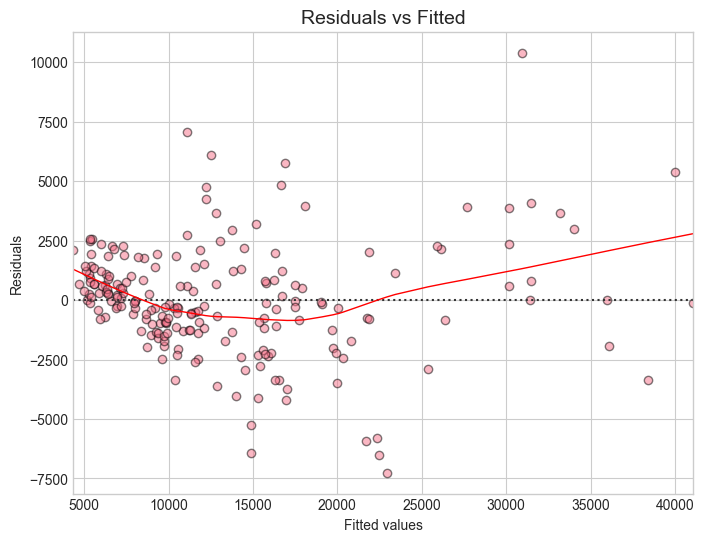

In [ ]:
diag.plot_residuals_vs_fitted() # проверка линейности (гомоскедастичности)
# Линия должна быть горизонтальной (около 0). Если есть изгиб, значит, зависимость нелинейная (нужно добавлять полиномы или логарифмировать)

2️⃣ Normal Q-Q plot  
Проверка нормальности остатков  
Что смотрим: точки лежат вдоль диагонали  
Важно:  
- лёгкие отклонения допустимы  
- сильные хвосты → проблемы с p-value и доверительными интервалами  
👉 Это особенно важно для инференса, а не для предсказаний.  

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


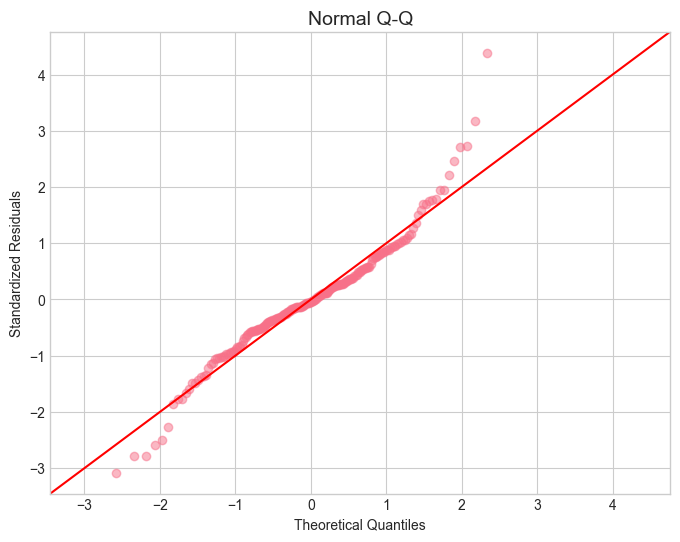

In [ ]:
diag.plot_qq() # проверка нормальности остатков
# Точки должны лежать на диагональной линии. Если "хвосты" уходят вверх или вниз, распределение ошибок не нормальное.

3️⃣ Scale–Location plot  
Ещё одна проверка гомоскедастичности  
По сути: дисперсия ошибок должна быть одинаковой по всему диапазону ŷ  
Плохо: 
- возрастающая “лестница”  
- воронка

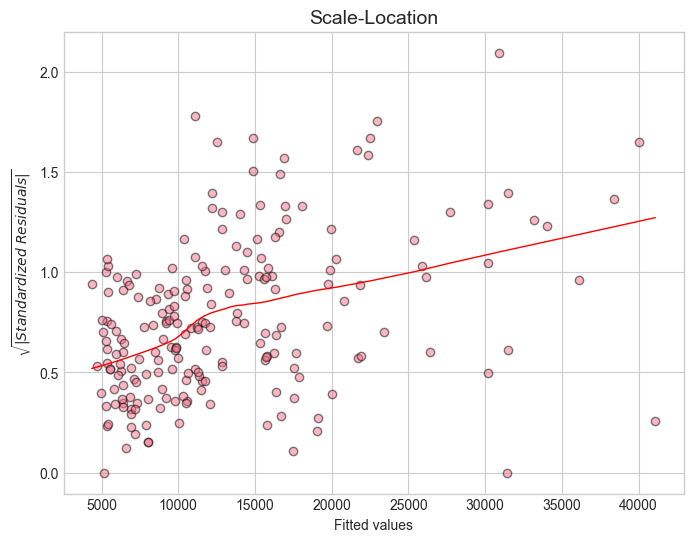

In [ ]:
diag.plot_scale_location()
# Линия должна быть горизонтальной. Если она идет под углом, значит, у вас гетероскедастичность (ошибка растет/падает вместе с ростом X).

4️⃣ Residuals vs Leverage (Cook’s distance)  
Поиск влиятельных наблюдений  
Это точки, которые:  
- редкие по X  
- сильно тянут коэффициенты  
Плохо:  
- несколько точек с большим Cook’s distance  
👉 Такие наблюдения могут искажать всю модель

C:\Users\911\AppData\Local\Temp\ipykernel_25740\2302528125.py:95: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), x, 'Cook\'s dist = 0.5')
C:\Users\911\AppData\Local\Temp\ipykernel_25740\2302528125.py:96: RuntimeWarning: invalid value encountered in sqrt
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), x, 'Cook\'s dist = 1')


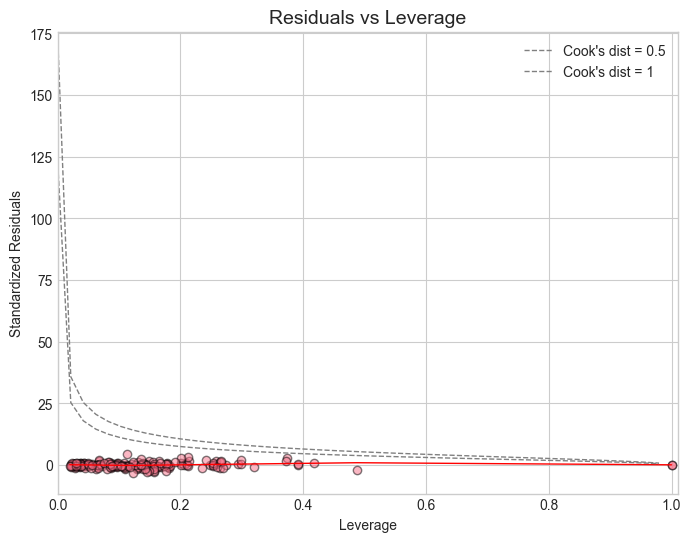

In [ ]:
diag.plot_leverage()
# Помогает найти точки, которые "ломают" модель. Если точка находится в правом верхнем или нижнем углу (за пунктирными линиями расстояния Кука), её, возможно, стоит удалить.

Лог трансформация зависимой переменной

<Axes: xlabel='price', ylabel='Count'>

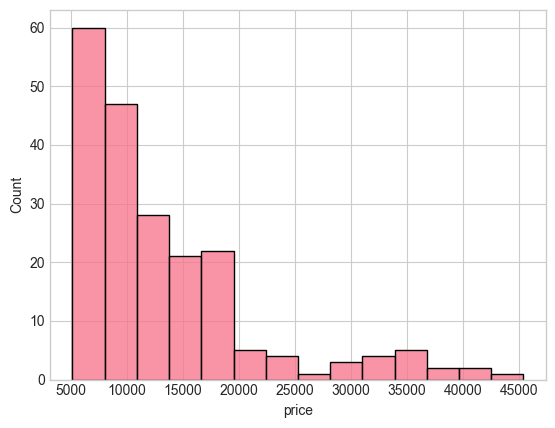

In [74]:
sns.histplot(y_2)

In [75]:
y_log = np.log(y_2)
y_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

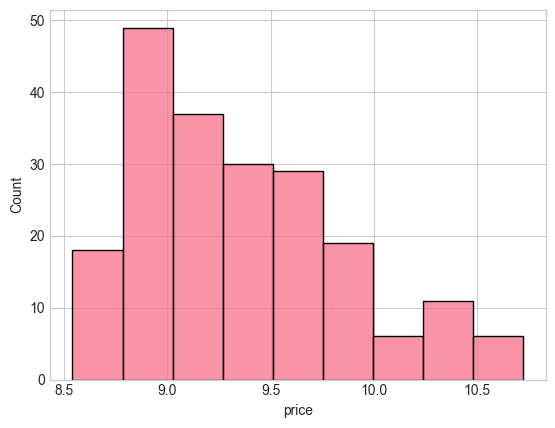

In [76]:
sns.histplot(y_log)

In [77]:
model_log = sm.OLS(y_log, x_2).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     83.72
Date:                 Сб, 27 дек 2025   Prob (F-statistic):           7.19e-86
Time:                        18:41:45   Log-Likelihood:                 114.85
No. Observations:                 205   AIC:                            -175.7
Df Residuals:                     178   BIC:                            -85.99
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.2200      0.766      8.125      0.000       4.709       7.731
carlength                 0.0026      0.003      0.865      0.388      -0.003       0.008
carwidth                  0.0320      0.015      2.143      0.033       0.003       0.061
curbweight                0.0003      0.000      2.964      0.003       0.000       0.001
enginesize               -0.0018      0.001     -1.329      0.186      -0.004       0.001
wheelbase                 0.0010      0.005      0.202      0.840      -0.009       0.011
boreratio                 0.0129      0.102      0.126      0.900      -0.189       0.214
horsepower                0.0068      0.001      6.944      0.000       0.005       0.009
fueltype_gas             -0.1877      0.058     -3.264      0.001      -0.301      -0.074
aspiration_turbo         -0.0824      0.046     -1.776      0.077      -0.174       0.009
carbody_hardtop          -0.3110      0.090     -3.472      0.001      -0.488      -0.134
carbody_hatchback        -0.3567      0.076     -4.673      0.000      -0.507      -0.206
carbody_sedan            -0.2781      0.080     -3.478      0.001      -0.436      -0.120
carbody_wagon            -0.3668      0.086     -4.246      0.000      -0.537      -0.196
drivewheel_fwd           -0.0312      0.066     -0.472      0.638      -0.162       0.099
drivewheel_rwd            0.0647      0.072      0.895      0.372      -0.078       0.207
enginetype_dohcv         -0.9758      0.268     -3.645      0.000      -1.504      -0.448
enginetype_l              0.1051      0.079      1.337      0.183      -0.050       0.260
enginetype_ohc            0.2164      0.053      4.090      0.000       0.112       0.321
enginetype_ohcf           0.1884      0.082      2.302      0.022       0.027       0.350
enginetype_ohcv          -0.1425      0.079     -1.796      0.074      -0.299       0.014
enginetype_rotor         -0.1667      0.123     -1.356      0.177      -0.409       0.076
cylindernumber_five      -0.4437      0.170     -2.602      0.010      -0.780      -0.107
cylindernumber_four      -0.5908      0.191     -3.089      0.002      -0.968      -0.213
cylindernumber_six       -0.3561      0.135     -2.640      0.009      -0.622      -0.090
cylindernumber_three     -0.3128      0.280     -1.117      0.266      -0.866       0.240
cylindernumber_twelve    -0.5501      0.200     -2.755      0.006      -0.944      -0.156
cylindernumber_two       -0.1667      0.123     -1.356      0.177      -0.409       0.076
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.172
Skew:                           0.185   Prob(JB):       

Обобщенная линейная модель

In [78]:
model_gamma = sm.GLM(y_2, x_2, family=sm.families.Gamma(link=sm.families.links.log())).fit()
model_gamma.summary()

c:\Users\911\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                  205
Model:                            GLM   Df Residuals:                      178
Model Family:                   Gamma   Df Model:                           26
Link Function:                    log   Scale:                        0.022463
Method:                          IRLS   Log-Likelihood:                -1805.0
Date:                 Сб, 27 дек 2025   Deviance:                       3.9369
Time:                        18:43:37   Pearson chi2:                     4.00
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.1949      0.774      8.007      0.000       4.678       7.711
carlength                 0.0027      0.003      0.912      0.362      -0.003       0.009
carwidth                  0.0314      0.015      2.082      0.037       0.002       0.061
curbweight                0.0003      0.000      2.841      0.005    9.42e-05       0.001
enginesize               -0.0020      0.001     -1.481      0.139      -0.005       0.001
wheelbase                 0.0016      0.005      0.316      0.752      -0.009       0.012
boreratio                 0.0260      0.103      0.252      0.801      -0.176       0.228
horsepower                0.0070      0.001      7.019      0.000       0.005       0.009
fueltype_gas             -0.1932      0.058     -3.323      0.001      -0.307      -0.079
aspiration_turbo         -0.0864      0.047     -1.842      0.066      -0.178       0.006
carbody_hardtop          -0.2921      0.091     -3.227      0.001      -0.470      -0.115
carbody_hatchback        -0.3556      0.077     -4.609      0.000      -0.507      -0.204
carbody_sedan            -0.2754      0.081     -3.408      0.001      -0.434      -0.117
carbody_wagon            -0.3684      0.087     -4.219      0.000      -0.539      -0.197
drivewheel_fwd           -0.0350      0.067     -0.523      0.601      -0.166       0.096
drivewheel_rwd            0.0688      0.073      0.942      0.346      -0.074       0.212
enginetype_dohcv         -1.0133      0.271     -3.745      0.000      -1.544      -0.483
enginetype_l              0.0872      0.079      1.098      0.272      -0.068       0.243
enginetype_ohc            0.2081      0.053      3.891      0.000       0.103       0.313
enginetype_ohcf           0.1710      0.083      2.067      0.039       0.009       0.333
enginetype_ohcv          -0.1485      0.080     -1.852      0.064      -0.306       0.009
enginetype_rotor         -0.1863      0.124     -1.500      0.134      -0.430       0.057
cylindernumber_five      -0.4556      0.172     -2.644      0.008      -0.793      -0.118
cylindernumber_four      -0.5989      0.193     -3.099      0.002      -0.978      -0.220
cylindernumber_six       -0.3618      0.136     -2.654      0.008      -0.629      -0.095
cylindernumber_three     -0.3208      0.283     -1.133      0.257      -0.876       0.234
cylindernumber_twelve    -0.5469      0.202     -2.710      0.007      -0.942      -0.151
cylindernumber_two       -0.1863      0.124     -1.500      0.134      -0.430       0.057
=========================================================================================
"""